1.importing the neccessary libraries for data importing,data manupulation and data visualization.

In [1]:
import pandas as pd #for data importing and manupulation
import numpy as np  #for data manupulation and cleaning
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization
%matplotlib inline 

2.import the dataset for training and test set

In [2]:
df = pd.read_csv('ame1.csv')
df1 = pd.read_csv('ame2.csv')

In [3]:
df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [4]:
df1.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1
0,411705,2017-07-08 00:00,732573,J,404347,53587,1,NaN,5.0,Male,5.0,3.0,NaN,0
1,208263,2017-07-08 00:00,172910,I,118601,28529,3,82527.0,NaN,NaN,NaN,NaN,NaN,1
2,239450,2017-07-08 00:00,172910,I,118601,28529,4,82527.0,NaN,NaN,NaN,NaN,NaN,1
3,547761,2017-07-08 00:00,557318,G,118601,28529,5,82527.0,1.0,Male,1.0,3.0,1.0,0
4,574275,2017-07-08 00:00,923896,H,118601,28529,5,82527.0,9.0,Female,3.0,1.0,NaN,1


3. checking the productID for both train and test

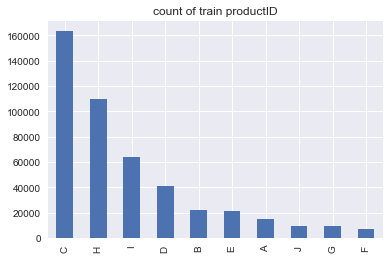

In [5]:
df['product'].value_counts().plot.bar()
plt.title('count of train productID')

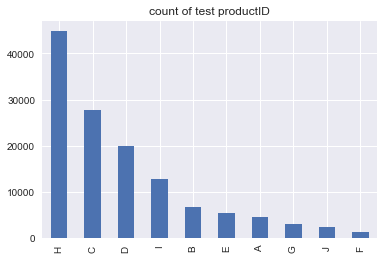

In [6]:
df1['product'].value_counts().plot.bar()
plt.title('count of test productID')

In [7]:
df.info() #checking the train info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 15 columns):
session_id                463291 non-null int64
DateTime                  463291 non-null object
user_id                   463291 non-null int64
product                   463291 non-null object
campaign_id               463291 non-null int64
webpage_id                463291 non-null int64
product_category_1        463291 non-null int64
product_category_2        97437 non-null float64
user_group_id             445048 non-null float64
gender                    445048 non-null object
age_level                 445048 non-null float64
user_depth                445048 non-null float64
city_development_index    338162 non-null float64
var_1                     463291 non-null int64
is_click                  463291 non-null int64
dtypes: float64(5), int64(7), object(3)
memory usage: 53.0+ MB


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128858 entries, 0 to 128857
Data columns (total 14 columns):
session_id                128858 non-null int64
DateTime                  128858 non-null object
user_id                   128858 non-null int64
product                   128858 non-null object
campaign_id               128858 non-null int64
webpage_id                128858 non-null int64
product_category_1        128858 non-null int64
product_category_2        52687 non-null float64
user_group_id             123174 non-null float64
gender                    123174 non-null object
age_level                 123174 non-null float64
user_depth                123174 non-null float64
city_development_index    94249 non-null float64
var_1                     128858 non-null int64
dtypes: float64(5), int64(6), object(3)
memory usage: 13.8+ MB


checking the descriptive statistics of the training and test set

In [9]:
df.describe()

,session_id,user_id,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,age_level,user_depth,city_development_index,var_1,is_click
count,463291.000000,4.632910e+05,463291.000000,463291.000000,463291.000000,97437.000000,445048.000000,445048.000000,445048.000000,338162.000000,463291.000000,463291.000000
mean,285544.090725,5.460497e+05,308474.540069,29685.878994,3.072427,162753.345105,3.477396,2.782266,2.878415,2.557121,0.422169,0.067627
std,168577.345887,3.294625e+05,126517.101294,21542.053106,1.304233,78743.742720,2.412889,1.069701,0.400130,0.921345,0.493906,0.251105
min,2.000000,4.000000e+00,82320.000000,1734.000000,1.000000,18595.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,137856.500000,2.578550e+05,118601.000000,13787.000000,2.000000,82527.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,285429.000000,5.318010e+05,359520.000000,13787.000000,3.000000,146115.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
75%,435535.500000,8.278490e+05,405490.000000,53587.000000,4.000000,254132.000000,4.000000,3.000000,3.000000,3.000000,1.000000,0.000000
max,595812.000000,1.141729e+06,414149.000000,60305.000000,5.000000,450184.000000,12.000000,6.000000,3.000000,4.000000,1.000000,1.000000


In [10]:
df1.describe()

,session_id,user_id,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,age_level,user_depth,city_development_index,var_1
count,128858.000000,1.288580e+05,128858.000000,128858.000000,128858.000000,52687.000000,123174.000000,123174.000000,123174.000000,94249.000000,128858.000000
mean,342583.536117,5.463770e+05,233272.064660,25789.437039,3.505052,127030.903183,3.533465,2.820230,2.876476,2.562796,0.387062
std,176742.967152,3.292898e+05,137538.509293,17998.971330,1.449608,74586.095260,2.455897,1.093987,0.403052,0.922149,0.487080
min,1.000000,4.000000e+00,82320.000000,1734.000000,1.000000,18595.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,207832.250000,2.592650e+05,105960.000000,11085.000000,2.000000,82527.000000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,350013.000000,5.300870e+05,118601.000000,28529.000000,4.000000,82527.000000,3.000000,3.000000,3.000000,2.000000,0.000000
75%,525928.250000,8.262290e+05,360936.000000,28529.000000,5.000000,146115.000000,4.000000,3.000000,3.000000,3.000000,1.000000
max,595813.000000,1.141714e+06,414149.000000,60305.000000,5.000000,450184.000000,12.000000,6.000000,3.000000,4.000000,1.000000


4 Data preprocessing and data visualization

In [11]:
df.isnull().sum()

session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64

In [12]:
df['product_category_2'].min(), df['product_category_2'].max(), df['product_category_2'].mean()

(18595.0, 450184.0, 162753.34510504224)

In [13]:
df['product_category_2'] = df['product_category_2'].fillna(value=450184.0)

In [14]:
df['product_category_2'] = np.log(df['product_category_2']).astype('int64')

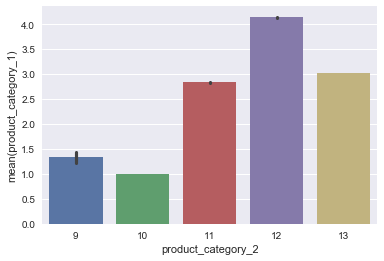

In [15]:
sns.barplot(x='product_category_2', y='product_category_1', data=df)

In [16]:
sns.set_style('whitegrid')

In [17]:
df['user_group_id'].max(), df['user_group_id'].min(), df['user_group_id'].median()

(12.0, 0.0, 3.0)

In [18]:
df['user_group_id'].value_counts()

3.0     140317
2.0     137278
4.0      50080
1.0      41946
5.0      21989
9.0      20264
10.0     13779
11.0      8839
8.0       6223
6.0       1724
7.0       1421
12.0      1035
0.0        153
Name: user_group_id, dtype: int64

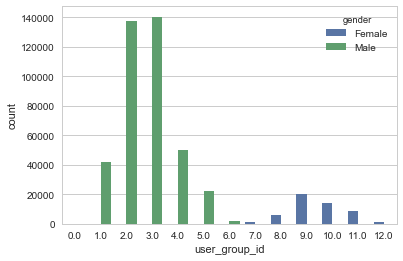

In [19]:
sns.countplot(x='user_group_id', hue='gender', data=df)

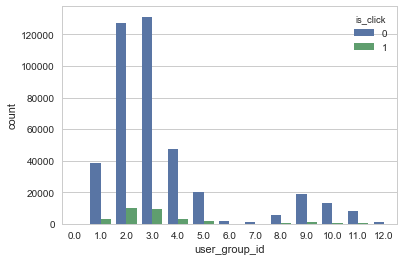

In [20]:
sns.countplot(x='user_group_id', hue='is_click', data=df)

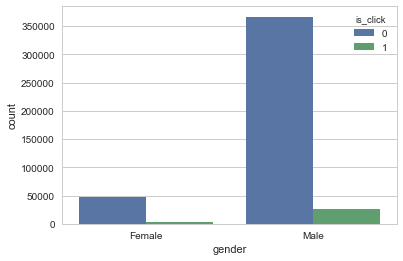

In [21]:
sns.countplot(x='gender', hue='is_click', data=df)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 15 columns):
session_id                463291 non-null int64
DateTime                  463291 non-null object
user_id                   463291 non-null int64
product                   463291 non-null object
campaign_id               463291 non-null int64
webpage_id                463291 non-null int64
product_category_1        463291 non-null int64
product_category_2        463291 non-null int64
user_group_id             445048 non-null float64
gender                    445048 non-null object
age_level                 445048 non-null float64
user_depth                445048 non-null float64
city_development_index    338162 non-null float64
var_1                     463291 non-null int64
is_click                  463291 non-null int64
dtypes: float64(4), int64(8), object(3)
memory usage: 53.0+ MB


In [23]:
df['user_group_id'] = df['user_group_id'].fillna(value=3.0)

In [24]:
df['gender'] = df['gender'].fillna(value='Female')

In [25]:
df['age_level'] = df['age_level'].fillna(value=3.0)

In [26]:
df['user_depth'].value_counts()

3.0    402798
2.0     30389
1.0     11861
Name: user_depth, dtype: int64

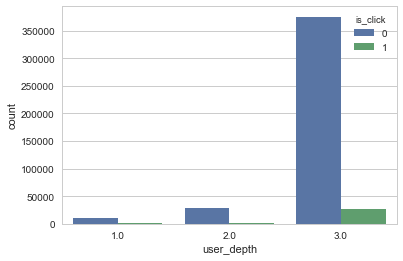

In [27]:
sns.countplot(x='user_depth', hue='is_click', data=df)

In [28]:
df['user_depth'] = df['user_depth'].fillna(value=3.0)

In [29]:
df['city_development_index'] = df['city_development_index'].fillna(value=2.0)

In [30]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [36]:
df['DateTime'] = df['DateTime']

TypeError: data type "datetime" not understood

In [33]:
df.drop(['session_id','user_id', 'campaign_id', 'webpage_id'],axis=1, inplace=True)

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.head()

In [ ]:
df1.fillna(0, inplace=True)

In [ ]:
X = df.drop('is_click', axis=1)
y = df.is_click

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=101)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
pre = rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
print(classification_report(y_test, pre))

In [ ]:
print(confusion_matrix(y_test, pre))

In [ ]:
print(accuracy_score(y_test, pre))

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
score = roc_auc_score(y_test, pre)

In [ ]:
score

In [ ]:
output = pd.DataFrame({'is_click': pre })
output.to_csv('am6.csv', index=False)